# ECE 4554/ ECE 5554 / Computer Vision
This file contains the coding problems (Machine Problems 1, 2, and 3) for Homework 2. 
Your job is to implement/modify the sections within this notebook that are marked with "TO DO".

##**TO DO**: Enter your Virginia Tech Username (PID) here: 906525375 

##**Honor Code reminder**

Once again, please review the Honor Code statement in the syllabus. 
This is not a "team project".  

##**Submission guidelines** for the coding problems (Google Colab)

1. Please verify that you have entered your Virginia Tech Username in all of the appropriate places.
2. After your solutions are complete, click Runtime->''Restart and run all''; then verify that all of your solutions are visible in this notebook.
3. Click File->Save near the top of the page to save the latest version of your notebook at Google Drive.
4. Verify that the last 2 cells have executed, creating a PDF version of this notebook at Google Drive. (Note: if you face difficulty with this step, please refer to https://pypi.org/project/notebook-as-pdf/)
5. Look at the PDF file and check that all of your solutions are displayed correctly there.
6. Download your notebook file and the PDF version to your laptop.
7. On your laptop, create a ZIP version of this notebook file. (Please don't include any separate data files.) Use file name Homework2_Code_USERNAME.zip, with your own Username.
6. For your PDF version, use file name Homework2_Notebook_USERNAME.pdf, with your own Username.
7. **<span style="color:blue"> Submit these 2 files and your PDF file for Problems 1-4 SEPARATELY to Canvas.**</span> Do not zip them all together.





# Set up the environment

In [ ]:
# Mount your Google Drive to this notebook
# The purpose is to allow your code to access to your files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the directory to your own working directory
# Your code will be able to read and write files in your working directory
# TO DO: enter the name of your directory
import os
os.chdir('/content/drive/My Drive/5554/HW2')

In [ ]:
# Import library modules
import sys
import cv2 # OpenCV library
from PIL import Image # Python Imaging Library
import numpy as np
import matplotlib.pyplot as plt

# (Note: we would use cv2.imshow if running on your laptop;
#  cv2.imshow is not allowed in Colab, so use cv2_imshow instead)
from google.colab.patches import cv2_imshow

---
#Machine Problem 1: Image Filtering (10 points)

Write Python/OpenCV code that will perform linear filtering of an image. Demonstrate correct operation of your code by applying filters that are commonly used for smoothing.

For this problem, do not use any OpenCV functions other than basic operations for loading/saving/displaying image files. During the filtering operation, your code must access pixel values directly, probably with nested 'for' loops. (We know that OpenCV has built-in functions that could be used here, such as cv2.filter2D and cv2.GaussianBlur, but you are not allowed to use them. The purpose of this problem is for you to gain a good understanding of operations at the pixel level.)

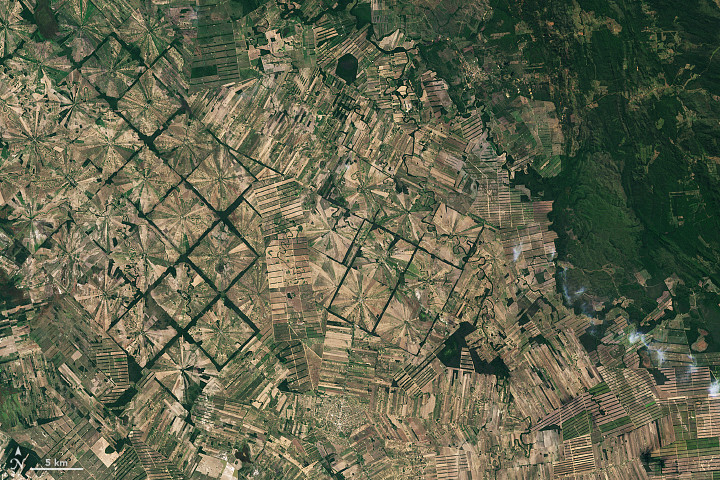

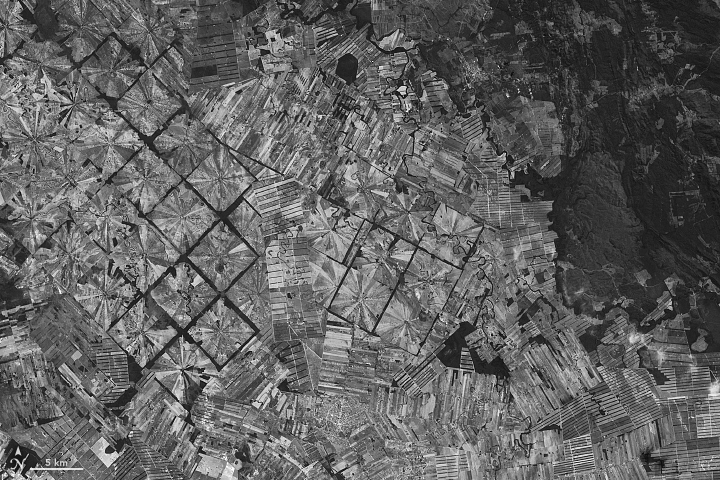

In [ ]:
# GETTING STARTED
# Verify that you can input an image from your working directory 
# and convert it to grayscale format. 
# The resulting img_grayscale will be the input to the filtering operations below.

# Image source:
# https://visibleearth.nasa.gov/images/150257/patterns-of-forest-change-in-bolivia/150257f

filename = "/content/boliviaradial_oli_2022234_front.jpg"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
cv2_imshow(img_color)

print ('\n')
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale)

a) Write a Python function linear_filter() that accepts an image and a kernel as input parameters. Your function must create an output image by applying the kernel (also called "filter", "operator", "template") to the input image. For convenience, use cross-correlation in your computations. (Apply the kernel directly, without any reversal of index.)  This new image is returned by your function.

In [ ]:
###################################
# TO DO: Implement the function

def linear_filter(img_in, kernel):
  '''Filter an input image by applying cross-correlation with a kernel.

  Input: 
    img_in: a grayscale image of any size larger than the kernel, 
     in both row and column directions.
    kernel: a 2D array of floating-point values;
     you may assume that this array is square, 
     with an odd number of rows and an odd number of columns;
     use the *center* of this kernel as its point of reference for filtering.
     Perform cross-correlation (do not reverse the kernel).

  Return value:
     an image with the same row/column size as img_in, 
     but each pixel is a floating-point value;
     apply the kernel only at locations where it fits entirely within the 
     input image; 
     the remaining pixels (near the outside border of the output image)
     must be set to zero;
     for any negative values, take the absolute value;
     clip the final output so that every pixel value lies in the range 0 to 255.

  '''

  # The following line is simply a placeholder; replace it with your code
  img_in=img_in.astype(np.float32)
  row,col=kernel.shape
  ctrcc=0
  for i in range(1,col,2):
    ctrcc=ctrcc+1
  #print('ctrccfin1',ctrcc)
  colnec=ctrcc*2
  rownec=ctrcc*2
  noc=ctrcc
  #print('ctrccfin',ctrcc)
  #noc=int(noc)+1
  #print(noc)
  row1,col1=img_in.shape
  #print(row,'row1',col,'col1')
  #print(row1,'row',col1,'col')
  img_out = np.copy(img_in)

  sum=0
  l3=[]
  
  #print(rownec)
  #print(colnec)
  for i in range(row1-rownec):
    for j in range(col1-colnec):
      sum=0
      for i1 in range(row):
        for j1 in range(col):
          ro=i1+i
          co=j1+j
          #print(ro)
          #print(co)
          pro=img_in[ro][co]*kernel[i1][j1]
          sum=sum+pro
      l3.append(sum)
  ans=np.array(l3)
  ans=ans.reshape(row1-rownec,col1-colnec)
  for i in range(row1-rownec):
    r1=i+noc
    for j in range(col1-colnec):
      c1=j+noc
      img_out[r1][c1]=ans[i][j]
  for i in range(row1):
    for j in range(col1):
      if(img_out[i][j]==img_in[i][j]):
        img_out[i][j]=0
      if(img_out[i][j]<0):
        img_out[i][j]=0
      if(img_out[i][j]>255):
        img_out[i][j]=255


  #img_out = img_in   
  
    
  return img_out # Each pixel must be of type np.float32




Test your linear_filter() function with the following commands.

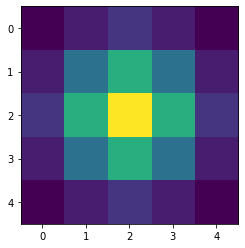

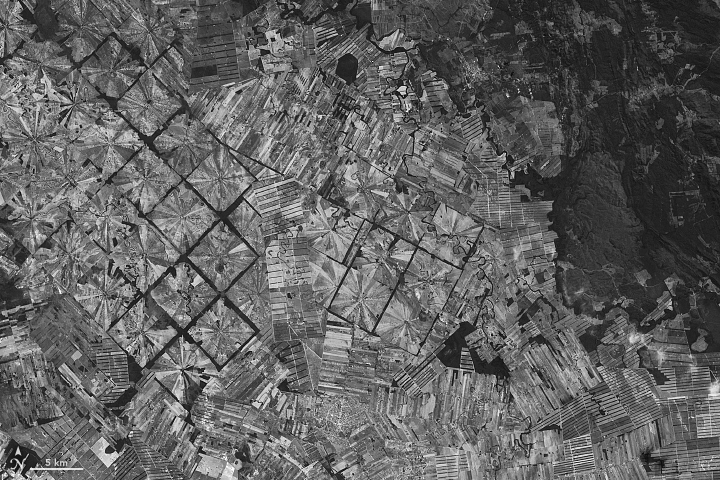

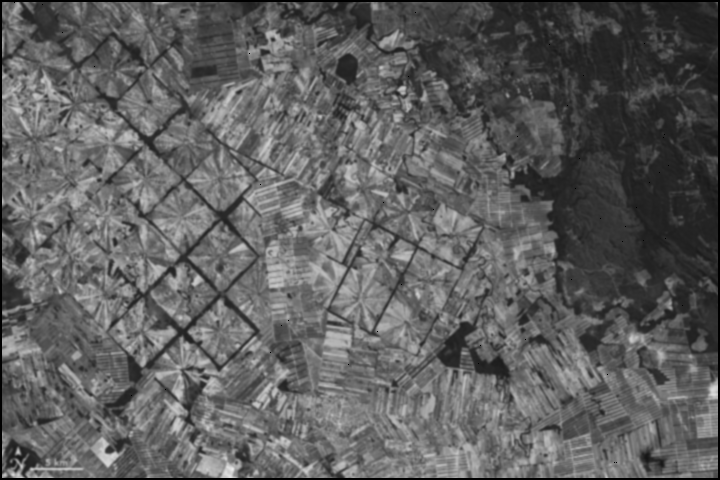

In [ ]:
# Here is an example smoothing filter, 
#  approximating a 2D Gaussian function with sigma = 1.
gaussian5x5 = np.array([
          [1, 4, 7, 4, 1],
          [4, 16, 26, 16, 4],
          [7, 26, 41, 26, 7],
          [4, 16, 26, 16, 4],
          [1, 4, 7, 4, 1,]], dtype=np.float32) / 273.0

# Apply the smoothing filter
img_result = linear_filter(img_grayscale, gaussian5x5)

# display the kernel
plt.imshow(gaussian5x5)
plt.show()

# Plot both images to make it easy to see that they are the same size
cv2_imshow(img_grayscale)
print('\n')
cv2_imshow(img_result)


b) Write a function gaussian_kernel() that returns a new kernel of size 7x7, approximating a 2D Gaussian function with sigma = 0.63.  Apply this kernel to img_grayscale, and plot the result. (You must calculate these kernel coefficients yourself. It is okay to calculate them at run-time; it is also okay to calculate them in advance and hard-code them into your function. You can use basic Python/NumPy math functions if you wish, but do not use any special OpenCV functions to create a kernel.)


In [ ]:
###################################
# TO DO: write the code

def gaussian_kernel():
    """
    Return a Gaussian kernel, to be used for image filtering
        
    Input parameters: 
     none

    Return value:
     a kernel of size 7x7, 
     approximating a 2D Gaussian function with sigma = 0.63

    """

    # The following line is simply a placeholder; replace it with your code
    newkernel = np.zeros((7, 7), dtype = float)
    newkernel = np.zeros((7, 7), dtype = float)
    sig=0.63
    x=-3
    for i in range(7):
      y=-3
      for j in range(7):
        e=-(np.square(x)+np.square(y))/(2*sig*sig)
        newkernel[i][j]=np.exp(e)/(2*3.14*sig*sig)
        y=y+1
      x=x+1  
    

    return newkernel


Test your functions gaussian_kernel() and linear_filter() with the following commands.

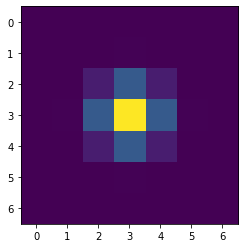

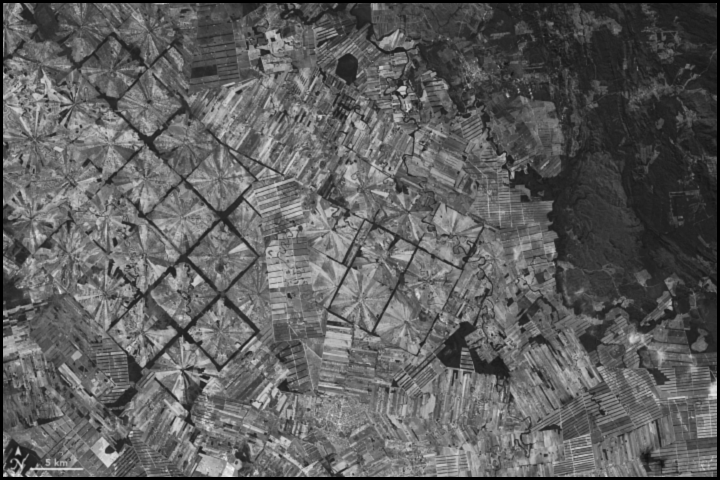

In [ ]:
gaussian7x7 = gaussian_kernel()
# display the kernel; the maximum value should be at the center
plt.imshow(gaussian7x7)
plt.show()

# display the filtered image
img_result = linear_filter(img_grayscale, gaussian7x7)
cv2_imshow(img_result)

---
# Machine Problem 2: Compass Edge Detection (10 points)


Write a Python function that will perform "compass" edge detection. You are encouraged (but not required) to write your code so that it uses your linear_filter() function from the previous problem.

For this problem, do not use any OpenCV functions other than basic operations for loading/saving/displaying image files. Your code must access pixel values directly.





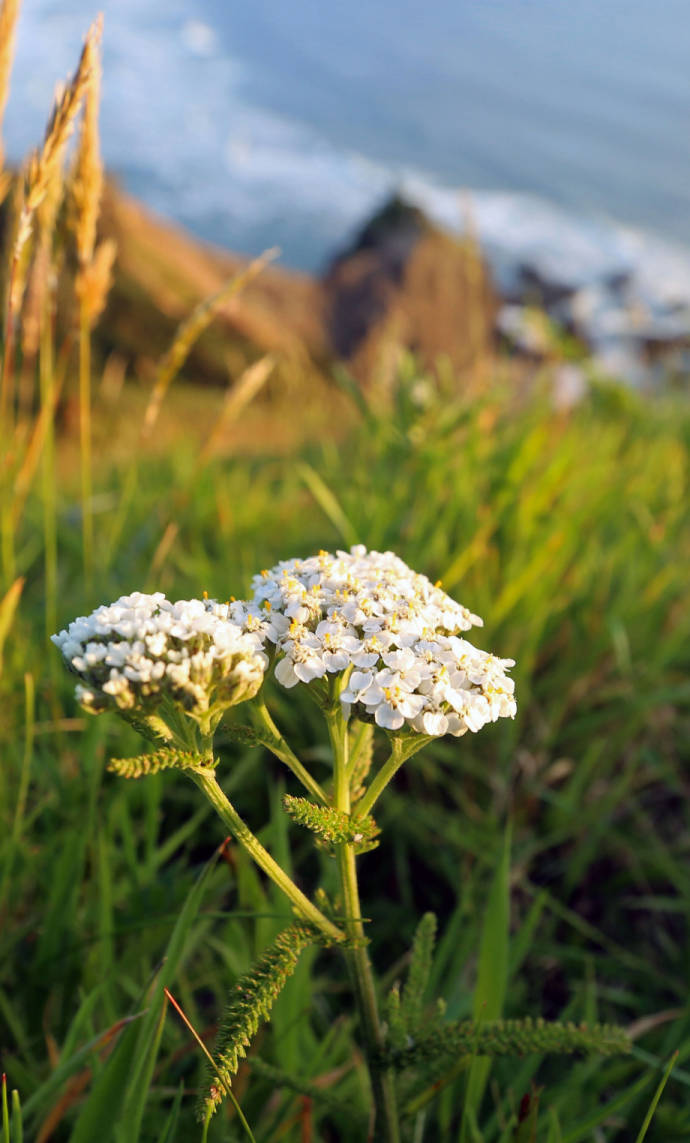

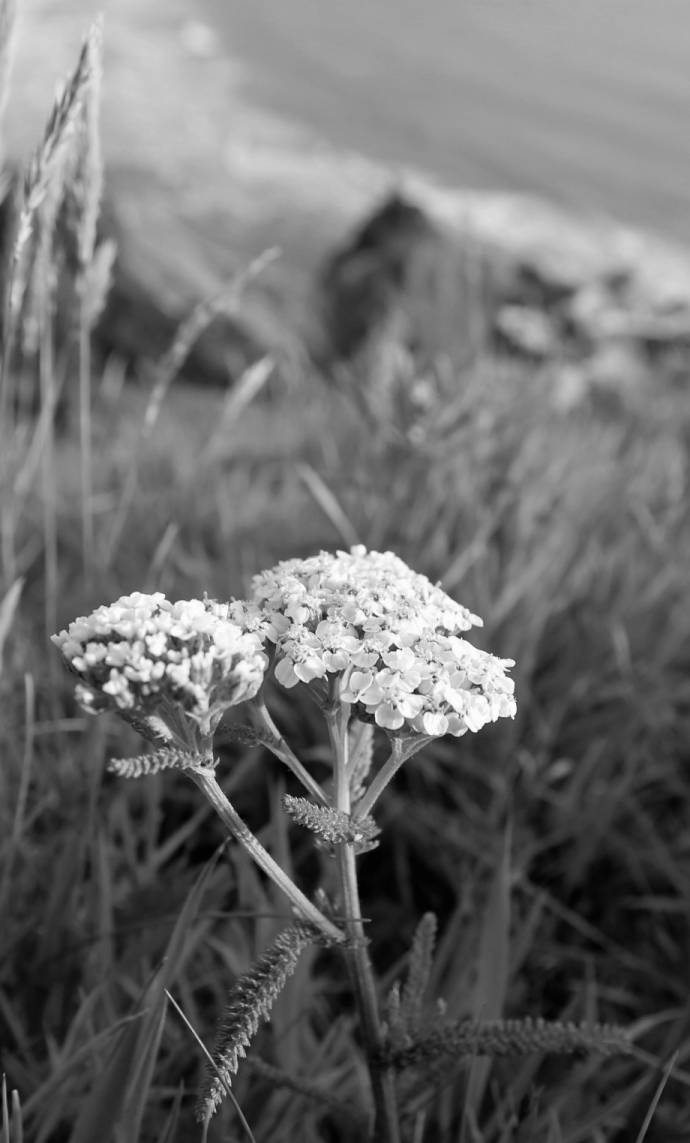

In [ ]:
# GETTING STARTED
# Verify that you can input another image from your working directory 
# and convert it to grayscale format. 
# The resulting img_grayscale will be the input to the edge-detection code.

# Image source:
# https://digitalmedia.fws.gov/digital/collection/natdiglib/id/30095/rec/41

filename = "/content/Achillea millefolium.jpg"
img_color2 = cv2.imread(filename, cv2.IMREAD_COLOR)
cv2_imshow(img_color2)

print ('\n')
img_grayscale2 = cv2.cvtColor(img_color2, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale2)

Write a Python function compass_edge() that will input a grayscale image and perform "compass" edge detection. The function must use the 4 generalized Sobel masks that are shown in packet 5 of the lecture slides. 

Your function should compute responses for all 4 of the generalized Sobel masks; take the absolute value of each response; and then assign to each output pixel the maximum of all 4 absolute-value responses at that pixel location. Finally, make a change to this output image that will aid in displaying your result: perform a linear mapping from the range \[minimum edge value, maximum edge value\] to the range \[0, 255\].  





In [ ]:
###################################
# TO DO: write the code

def compass_edge(img_in):
  """
  Detect edges in an image
        
  Input parameters: 
    img_in: a grayscale image 

  Return value:
    an "edge image" with the same row/column size as img_in
  """

  # The following line is simply a placeholder; replace it with your code
  so1=np.array([
          [1, 0, -1],
          [2, 0, -2],
          [1, 0, -1]], dtype=np.float32)
  so2=np.array([
          [-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]], dtype=np.float32)
  so3=np.array([
          [-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]], dtype=np.float32)
  so4=np.array([
          [1, 2, 1],
          [0, 0, 0],
          [-1, -2, -1]], dtype=np.float32)
  so5=np.array([
          [2, 1, 0],
          [1, 0, -1],
          [0, -1, -2]], dtype=np.float32)
  so6=np.array([
          [-2, -1, 0],
          [-1, 0, 1],
          [0, 1, 2]], dtype=np.float32)
  img_result1 = linear_filter(img_grayscale2, so1)
  row2,col2=img_grayscale2.shape
  img_result2=linear_filter(img_grayscale2, so2)
  img_result3=linear_filter(img_grayscale2, so3)
  img_result4=linear_filter(img_grayscale2, so4)
  img_result5=linear_filter(img_grayscale2, so5)
  img_result6=linear_filter(img_grayscale2, so6)
 # cv2_imshow(img_result1)
  #cv2_imshow(img_result2)
 # cv2_imshow(img_result3)
 # cv2_imshow(img_result4)
  img_out = np.zeros(img_in.shape)
  for i in range(row2):
    for j in range(col2):
      img_out[i][j]=max(abs(img_result2[i][j]),abs(img_result4[i][j]),abs(img_result5[i][j]),abs(img_result6[i][j]))
  #img_out = np.zeros(img_in.shape)
  
  return img_out

Test your function compass_edge() with the following commands.

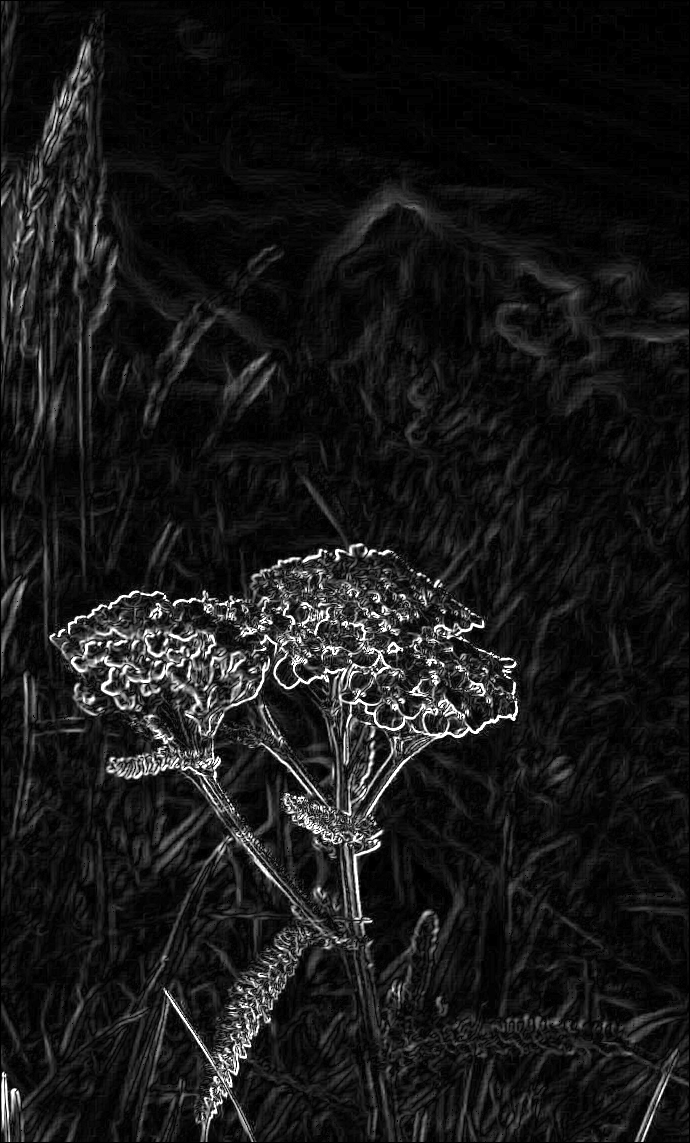

In [ ]:
img_result2 = compass_edge(img_grayscale2)
cv2_imshow(img_result2.astype(np.uint8))

# Machine Problem 3: Gaussian Pyramid (10 points)

Write a function named generate_pyramid() that generates a Gaussian Pyramid. For a given grayscale image, your function should apply your 7x7 Gaussian filter and downscale (subsample) the result. In your code, use a loop to perform these steps successively to generate multiple layers of a pyramid, and display all of those images.

For full credit, you must use your gaussian_kernel() and linear_filter() functions from Machine Problem 1. The subsampling step should result in a new image that is half the width and half the height of the input. (For odd-numbered dimensions, simply ignore the fractional part when computing the new width and height.)

The final pyramid should consist of the original grayscale image along with at least 5 filtered and subsampled images. Display all of the images in your pyramid. 

For this problem, do not use external or imported functions for filtering or downscaling. Do not use any OpenCV functions other than basic operations for loading/saving/displaying image files. 

In [ ]:
####################################
# TO DO: write the code

def generate_pyramid(img_in):
  """
  Generate and display a Gaussian pyramid
        
  Input parameters: 
    img_in: a grayscale image 

  Return value:
    none
  """
  f=img_in
  for i in range(5):
    img2=f
    rowp,colp=img2.shape
    roo=rowp//2
  #print('row',rowp)
  #print('col',colp)
  #print('row/2',roo)
  #print('mod',roo%2)
    coo=colp//2
  #print('col/2',coo)
    img_o=np.zeros((roo,coo))
    rrr=0
  #print(r)
    if(rowp%2!=0):
      rowp=rowp-1
    if(colp%2!=0):
      colp=colp-1
    rrr=0
    for i in range(0,rowp,2):
      ccc=0
    #print(i)
      for j in range(0,colp,2):
        img_o[rrr][ccc]=img2[i][j]
      #print('rrr',rrr)
      #print('ccc',ccc)
        ccc=ccc+1
      rrr=rrr+1
    fil=gaussian_kernel()
    f=linear_filter(img_o,fil)
  #print(f.shape)
  #cttr=cttr+1
    cv2_imshow(f)
  
  # place your code here




Test your generate_pyramid() function with the following commands.

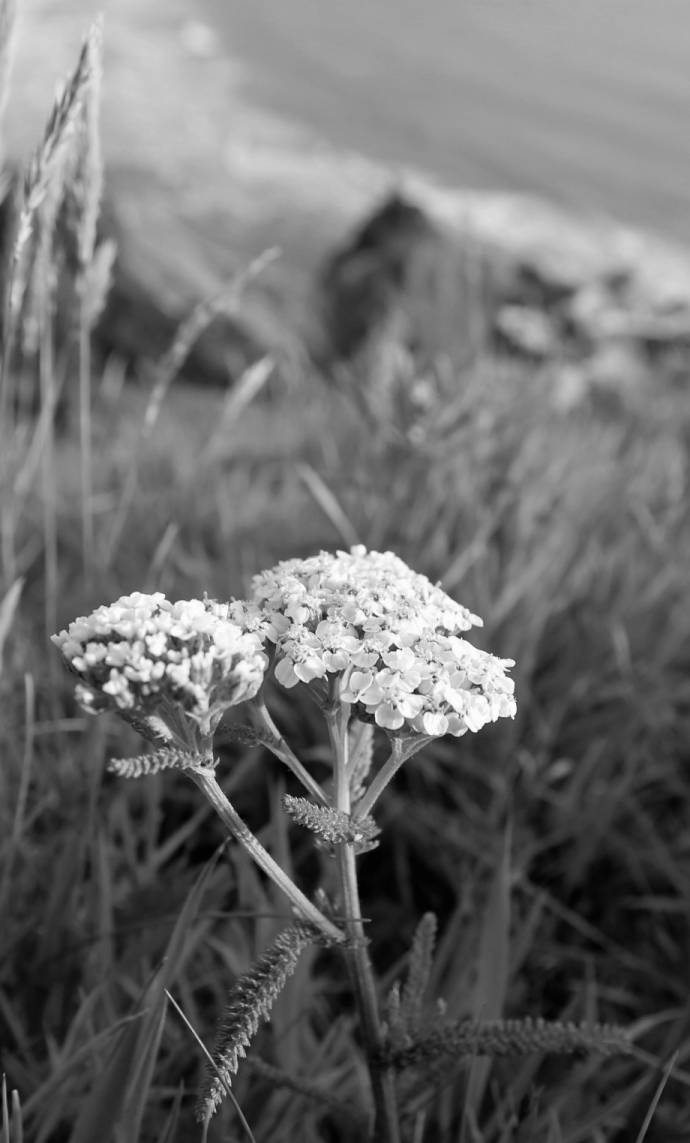

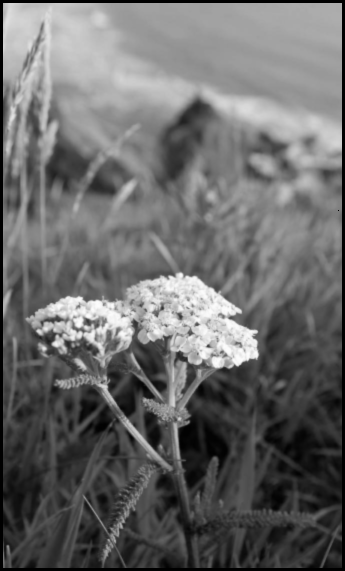

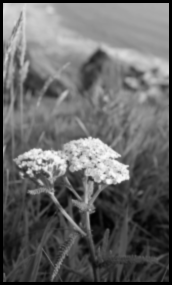

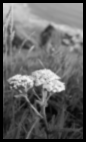

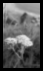

In [ ]:
filename = "/content/Achillea millefolium.jpg"
img_color2 = cv2.imread(filename, cv2.IMREAD_COLOR)
img_grayscale2 = cv2.cvtColor(img_color2, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale2)
generate_pyramid(img_grayscale2)
#for i in range(4):
  #x=generate_pyramid(x)
#f=generate_pyramid(x)



#generate_pyramid(img_grayscale2)

---
# Creating a PDF version of your current notebook

In [ ]:
#The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc 
!pip install --quiet pypandoc

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 155569 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2_all.deb ...
Unpacking fonts-lato (2.0-2) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.8-2_all.deb ...
Unpacking poppler-data (0.4.8-2) ...
Selecting previously unselected package tex-common.
Preparing to unpack .../03-tex-common_6.09_all.deb ...
Unpacking tex-common (6.09) ...
Selecting previously unselected package fonts-lmodern.
Preparing to unpack .../04-fonts-lmodern_2.004.5-3_all.deb ...
Unpacking fonts-lmodern (2.004.5-3) ...
Selecting previously unselected package fonts-noto-mono.
Preparing to unpack .

In [ ]:
# TO DO: Provide the full path to your Jupyter notebook file
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/Homework2_bennyantony.ipynb"
#os.chdir('/content/drive/MyDrive/5554/HW2')

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Homework2_bennyantony.ipynb to PDF
[NbConvertApp] Support files will be in Homework2_bennyantony_files/
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] Making directory ./Homework2_bennyantony_files
[NbConvertApp] M